# Exercise 2: Introduction to NetworkX

**FOR SECOND EXERCISE (25th/26th FEBRUARY)**

In this exercise we are going to work with the NetworkX package, which is a very popular python package to work with graphs. Make sure you have this package installed, and have the documentation of the package ready:
https://networkx.github.io/documentation/stable/index.html

In [1]:
import networkx as nx

### Example 1: Creating and Growing a Graph

__a)__ Creation of an empty graph

In [2]:
# undirected network
G = nx.Graph()
# directed network
G1 = nx.DiGraph()

__b)__ Adding Nodes

In [3]:
# add a single node
G.add_node(1)
print(G.nodes())

[1]


In [4]:
# add nodes from list
G.add_nodes_from([2, 3])
G1.add_nodes_from([2, 3])

print(G.nodes())
print(G1.nodes())

[1, 2, 3]
[2, 3]


In [5]:
# add nodes from other graphs
H = nx.path_graph(10)
print(H.nodes())

G.add_nodes_from(H)
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]


__c)__ Adding Edges

In [6]:
# add edges one at a time
G.add_edge(1, 2)
G.add_edge(2, 1)

G1.add_edge(1, 2)
G1.add_edge(2, 1)

print(G.edges())
print(G1.edges())

[(1, 2)]
[(2, 1), (1, 2)]


In [7]:
# add multiple edges from list
G.add_edges_from([(2, 5), (4, 6)])

In [8]:
# add edges from other graphs
print(H.edges())

G.add_edges_from(H.edges)
print(G.edges())

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(1, 2), (1, 0), (2, 5), (2, 3), (3, 4), (4, 6), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


### Example 2: Analyzing Graphs

__a)__ Connected Components

In [9]:
# build a second connected component
G.add_edges_from([(10,11),(11,12),(10,12)])

list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12}]

__b)__ Accessing Degrees

In [10]:
# degree of all nodes
print(G.degree())

# degree of a certain node
print(G.degree(3))

[(1, 2), (2, 3), (3, 2), (0, 1), (4, 3), (5, 3), (6, 3), (7, 2), (8, 2), (9, 1), (10, 2), (11, 2), (12, 2)]
2


### Example 3: Drawing a Graph

In [11]:
import matplotlib.pyplot as plt

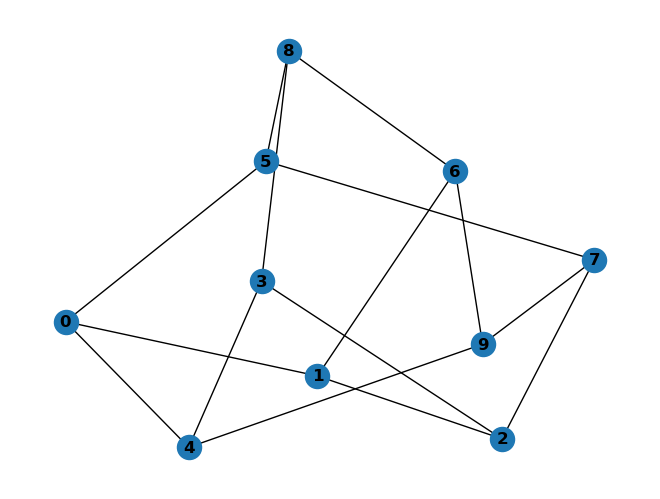

In [12]:
G = nx.petersen_graph()

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

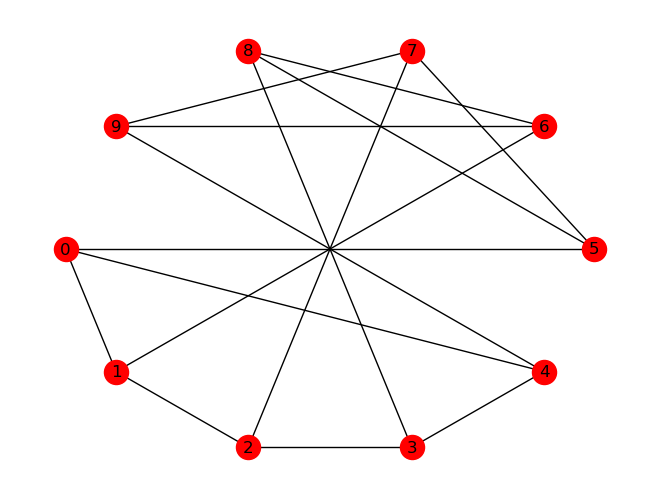

In [13]:
# different layout
nx.draw_shell(G, node_color='red', with_labels=True)

### Task 0: Load a network file

In the following tasks we are going to investigate a network of jazz musicians, where each node represents a musician, and a connection is drawn if they have colaborated.

Refresh your notebook, and execute the cell below to load the jazz musician network.

In [14]:
G = nx.read_edgelist('jazz.txt',nodetype=int)

Note that in all the following tasks, you should try to use functions from the networkX package wherever possible.

### Task 1: Basic statistics

__a)__ Print the number of nodes in G!

__b)__ Print the number of edges in G!

__c)__ Give the density of the network!

__d)__ Get the node ID and the degree of the node with the highest degree in the network!

### Task 2: Further Statistics

__a)__	 How many connected components does the network consist of?

__b)__ What is the diameter of the network?

__c)__ Compute the average distance between nodes!


__d)__	What is the shortest path from node 1 to node 10: Give the length and the node IDs it traverses!

### Task 3: Plotting the Graph

__a)__ Plot the network using a spring layout. For your own enjoyment: try to plot the network with different layouts.

In [15]:
import matplotlib.pyplot as plt

__b)__ Plot the nodes and edges of the shortest path in 2d) in green color!

### Task 4: Embedded Edges

Compute the *embeddedness* of each edge, which is the number of neighbors that its constituent nodes have in common. 

For example: The friendship edge of A and B has an embeddedness of 2 if A and B have two friends in common. 

Remove all edges with an embeddedness less than or equal to 2 and plot the resulting network.